In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importowanie klas na potrzeby budowy sieci
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.random import set_seed

In [48]:
set_seed(0)

In [49]:
# tworzenie sieci
model = Sequential()
model.add( Dense(10, activation="linear", input_shape=[1]) ) # warstwa wejściowa
model.add( Dense(2, activation="linear") )
model.add( Dense(1, activation="linear") )

In [50]:
# kompilacja
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 2)                 22        
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [52]:
df = pd.read_csv("http://51.91.120.89/extras/f-c.csv", usecols=[1,2])
df.head()

,F,C
0,-140.0,-95.55
1,-136.0,-93.33
2,-124.0,-86.66
3,-112.0,-80.00
4,-105.0,-76.11


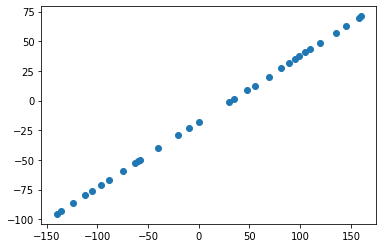

In [53]:
plt.scatter(df.F, df.C)

In [54]:
result = model.fit(df.F, df.C, epochs=1500, verbose=0)

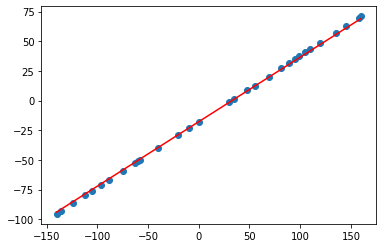

In [55]:
y_pred = model.predict(df.F)
plt.scatter(df.F, df.C)
plt.plot(df.F, y_pred, c="r")

In [56]:
df1 = pd.DataFrame( result.history)
df1.head(10)

,loss,mae
0,1309.766357,29.903528
1,1119.745483,27.492002
2,1001.839417,25.930193
3,913.800537,24.703901
4,842.959167,23.700977
5,783.598145,22.808640
6,732.586670,22.064835
7,688.000488,21.420965
8,648.561218,20.857367
9,613.370178,20.392452


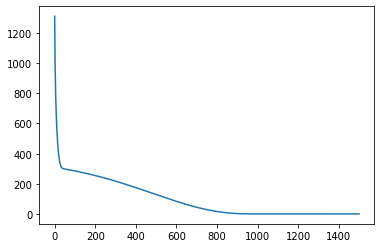

In [57]:
df1.loss.plot()

In [58]:
# regresja dla danych Boston House Pricing
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [60]:
ds = load_boston()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df["MEDV"] = ds.target
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [61]:
X = df.iloc[:, :-1]
y = df.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [62]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [77]:
set_seed(0)

# tworzenie sieci
model = Sequential()
model.add( Dense(32, activation="relu", input_shape=(13,) ) ) # warstwa wejściowa
model.add( Dense(4, activation="relu") )
model.add( Dense(1, activation="relu") )

In [78]:
model.compile(loss="mse", metrics=["mae"])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                448       
                                                                 
 dense_22 (Dense)            (None, 4)                 132       
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 585
Trainable params: 585
Non-trainable params: 0
_________________________________________________________________


In [79]:
result = model.fit(X_train, y_train, epochs=600, verbose=0, validation_split=0.05)

In [80]:
df1 = pd.DataFrame( result.history )
df1.head(10)

,loss,mae,val_loss,val_mae
0,611.554504,22.794809,525.380737,21.408667
1,607.487915,22.643196,532.445679,21.619047
2,608.015930,22.687910,532.445679,21.619047
3,608.116028,22.702232,520.378418,21.208212
4,608.064880,22.693579,532.445679,21.619047
5,608.099304,22.707571,532.445679,21.619047
6,607.698364,22.666492,531.919434,21.605093
7,607.862671,22.676310,532.445679,21.619047
8,607.940491,22.690628,526.039612,21.430902
9,607.784485,22.675526,532.445679,21.619047


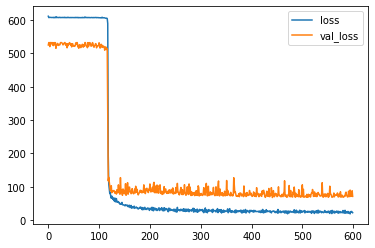

In [81]:
df1[ ["loss","val_loss"] ].plot()

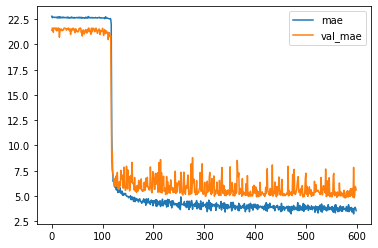

In [82]:
df1[ ["mae","val_mae"] ].plot()

In [83]:
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(X_test) )

0.6392668168351789

In [102]:
# Sieć dla znormalizowanych wartości zm. niezależnej
X_scale = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=.2, random_state=42)

set_seed(0)

# tworzenie sieci
model = Sequential()
model.add( Dense(32, activation="relu", input_shape=(13,) ) ) # warstwa wejściowa
model.add( Dense(8, activation="relu") )
model.add( Dense(1, activation="relu") )

model.compile(loss="mse", metrics=["mae"], optimizer="sgd")
result = model.fit(X_train, y_train, epochs=600, verbose=0, validation_split=0.05)

In [103]:
df1 = pd.DataFrame(result.history)

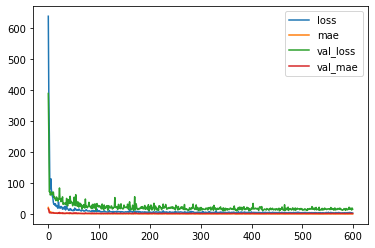

In [104]:
df1.plot()

In [105]:
r2_score(y_test, model.predict(X_test) )

0.8620335915100463

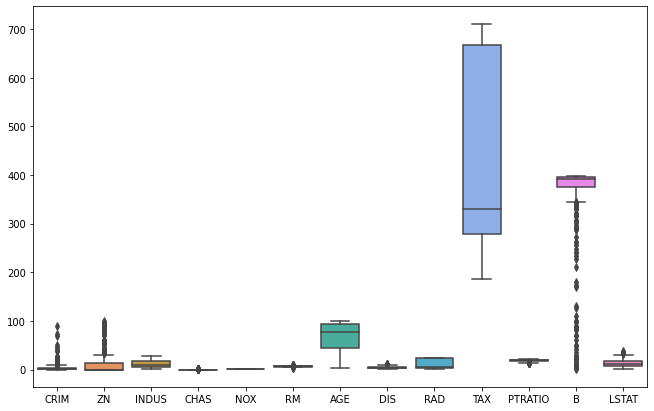

In [106]:
plt.figure(figsize=(11,7))
sns.boxplot(data=X)

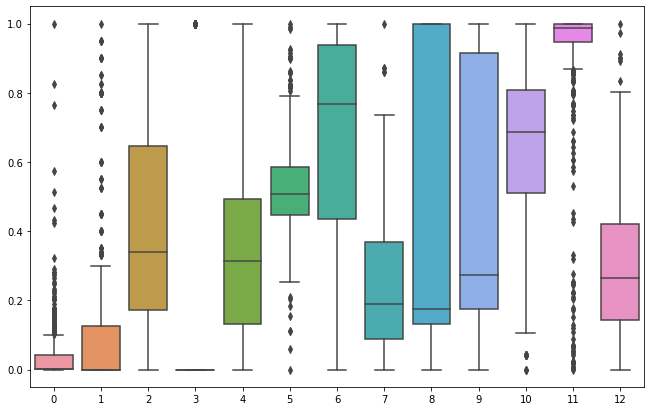

In [107]:
plt.figure(figsize=(11,7))
sns.boxplot(data=X_scale)